# CaféLab
**Autor:** J. Orozco  
**Fecha:** 2025-05-29  

## Análisis de Bandas de Absorbancia en Muestras de Café

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from pathlib import Path

# Configuración de visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


In [3]:
# Lectura de datos desde la carpeta Data
data_path = Path('Data')

try:
    ACh = pd.read_csv(data_path / 'AChMN.csv')
    AMi = pd.read_csv(data_path / 'AMi.csv')
    AGo = pd.read_csv(data_path / 'AGo.csv')
    AOx = pd.read_csv(data_path / 'AOx.csv')
    AIlly = pd.read_csv(data_path / 'AIlly.csv')
    
    print("Datos cargados exitosamente:")
    print(f"- ACh: {ACh.shape}")
    print(f"- AMi: {AMi.shape}")
    print(f"- AGo: {AGo.shape}")
    print(f"- AOx: {AOx.shape}")
    print(f"- AIlly: {AIlly.shape}")
    
except FileNotFoundError as e:
    print(f"Error al cargar archivos: {e}")
    print("Verifica que la carpeta 'Data' y los archivos CSV estén en la ubicación correcta")

Datos cargados exitosamente:
- ACh: (421, 5)
- AMi: (421, 5)
- AGo: (421, 5)
- AOx: (421, 5)
- AIlly: (421, 2)


In [4]:
# Preparación de datos de AIlly
# Agregamos las columnas 75, 18 y 225 a AIlly para evitar errores y que tenga las mismas columnas que los demás datos
AIlly['75'] = 0
AIlly['18'] = 0
AIlly['225'] = 0

# Reordenamos las columnas
AIlly = AIlly[['nm', '75', '15', '18', '225']]

print("Columnas de AIlly ajustadas:")
print(AIlly.columns.tolist())

Columnas de AIlly ajustadas:
['nm', '75', '15', '18', '225']


In [5]:
# Reemplazo de valores 0 por NaN
ACh = ACh.replace(0, np.nan)
AGo = AGo.replace(0, np.nan)
AMi = AMi.replace(0, np.nan)
AOx = AOx.replace(0, np.nan)
AIlly = AIlly.replace(0, np.nan)

print("Valores 0 reemplazados por NaN en todos los dataframes")

Valores 0 reemplazados por NaN en todos los dataframes


### Análisis de Bandas de Absorbancia

Realizaremos una gráfica que contenga todas las muestras de café con los rangos donde se deberían ver las 2 bandas principales.

Primero encontremos los rangos de las bandas utilizando los datos de Chiapas (ACh)

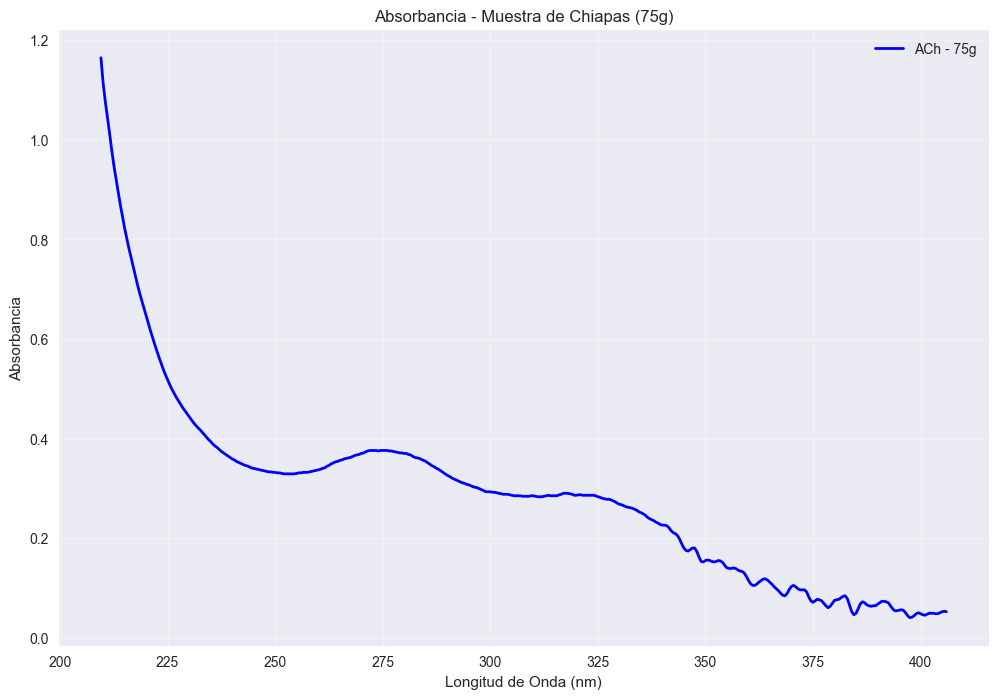

Se pueden apreciar dos bandas significativas en la gráfica


In [6]:
# Gráfica inicial con datos de Chiapas (75g)
plt.figure(figsize=(12, 8))
plt.plot(ACh['nm'], ACh['75'], linewidth=2, color='blue', label='ACh - 75g')
plt.xlabel('Longitud de Onda (nm)')
plt.ylabel('Absorbancia')
plt.title('Absorbancia - Muestra de Chiapas (75g)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Se pueden apreciar dos bandas significativas en la gráfica")

## Identificación de Bandas

Se pueden apreciar dos bandas significativas:
* **Banda 1**: ~275 nm
* **Banda 2**: ~325 nm

Daremos un intervalo de confianza del 95%:

### Rangos:
* **Banda 1**: (270, 280) nm -- en azul
* **Banda 2**: (320, 330) nm -- en rojo

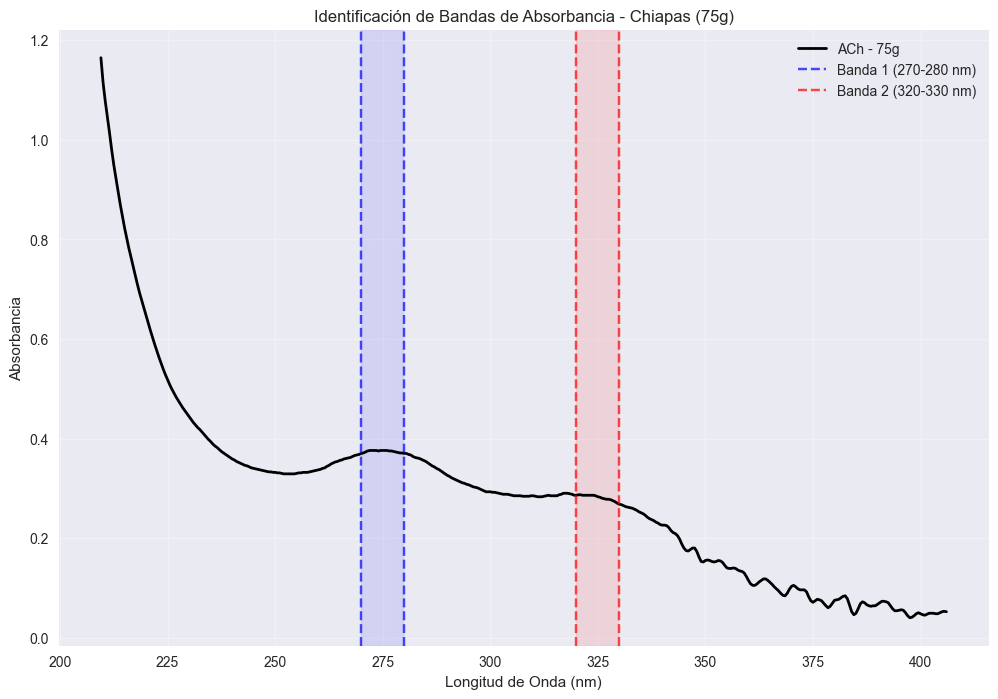

In [7]:
# Gráfica con rangos de bandas marcados
plt.figure(figsize=(12, 8))
plt.plot(ACh['nm'], ACh['75'], linewidth=2, color='black', label='ACh - 75g')

# Banda 1 (270-280 nm)
plt.axvline(x=270, color='blue', linestyle='--', alpha=0.7, label='Banda 1 (270-280 nm)')
plt.axvline(x=280, color='blue', linestyle='--', alpha=0.7)
plt.axvspan(270, 280, alpha=0.1, color='blue')

# Banda 2 (320-330 nm)
plt.axvline(x=320, color='red', linestyle='--', alpha=0.7, label='Banda 2 (320-330 nm)')
plt.axvline(x=330, color='red', linestyle='--', alpha=0.7)
plt.axvspan(320, 330, alpha=0.1, color='red')

plt.xlabel('Longitud de Onda (nm)')
plt.ylabel('Absorbancia')
plt.title('Identificación de Bandas de Absorbancia - Chiapas (75g)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Preparación de datos combinados

Ahora juntamos todas las muestras para comparar sus comportamientos dentro de los intervalos.

**Nota:** Solo se incluye al café Illy en las gráficas de 15g, esto debido a que no se realizó con 7.5g, 18g ni 22.5g

In [8]:
# Agregar columna de grupo a cada dataframe
AMi_copy = AMi.copy()
AGo_copy = AGo.copy()
ACh_copy = ACh.copy()
AOx_copy = AOx.copy()
AIlly_copy = AIlly.copy()

AMi_copy['grupo'] = 'AMi'
AGo_copy['grupo'] = 'AGo'
ACh_copy['grupo'] = 'ACh'
AOx_copy['grupo'] = 'AOx'
AIlly_copy['grupo'] = 'AIlly'

# Combinar todos los dataframes
df_todo = pd.concat([ACh_copy, AGo_copy, AIlly_copy, AMi_copy, AOx_copy], ignore_index=True)

print(f"Dataframe combinado creado con {df_todo.shape[0]} filas y {df_todo.shape[1]} columnas")
print(f"Grupos únicos: {df_todo['grupo'].unique()}")

Dataframe combinado creado con 2105 filas y 6 columnas
Grupos únicos: ['ACh' 'AGo' 'AIlly' 'AMi' 'AOx']


### Gráficas de las diferentes diluciones

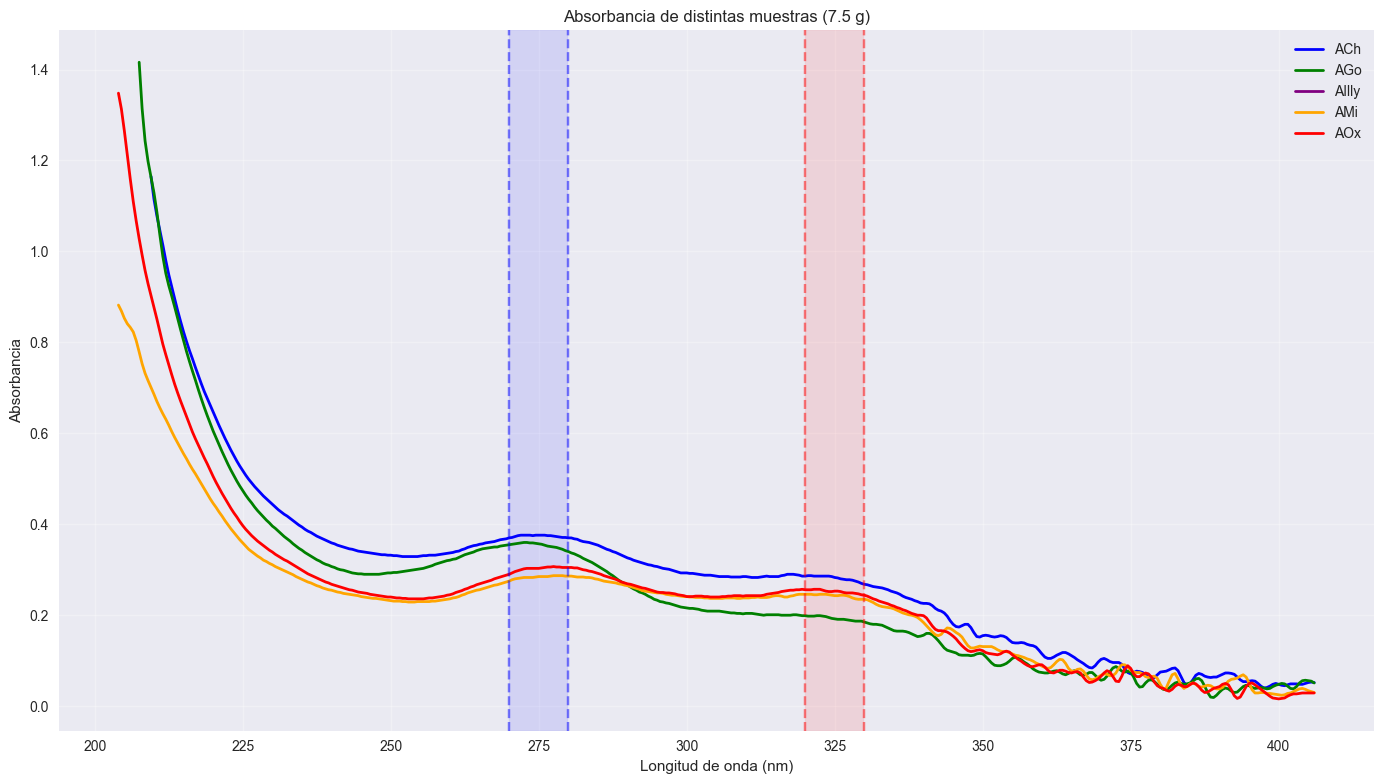

In [9]:
# Función para crear gráficas con bandas marcadas
def plot_absorbancia_con_bandas(df, columna, titulo):
    plt.figure(figsize=(14, 8))
    
    # Colores para cada grupo
    colors = {'ACh': 'blue', 'AGo': 'green', 'AIlly': 'purple', 'AMi': 'orange', 'AOx': 'red'}
    
    for grupo in df['grupo'].unique():
        data_grupo = df[df['grupo'] == grupo]
        plt.plot(data_grupo['nm'], data_grupo[columna], 
                label=grupo, color=colors.get(grupo, 'black'), linewidth=2)
    
    # Banda 1 (270-280 nm)
    plt.axvline(x=270, color='blue', linestyle='--', alpha=0.5)
    plt.axvline(x=280, color='blue', linestyle='--', alpha=0.5)
    plt.axvspan(270, 280, alpha=0.1, color='blue')
    
    # Banda 2 (320-330 nm)
    plt.axvline(x=320, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=330, color='red', linestyle='--', alpha=0.5)
    plt.axvspan(320, 330, alpha=0.1, color='red')
    
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Absorbancia')
    plt.title(titulo)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Gráficas para cada concentración
plot_absorbancia_con_bandas(df_todo, '75', 'Absorbancia de distintas muestras (7.5 g)')

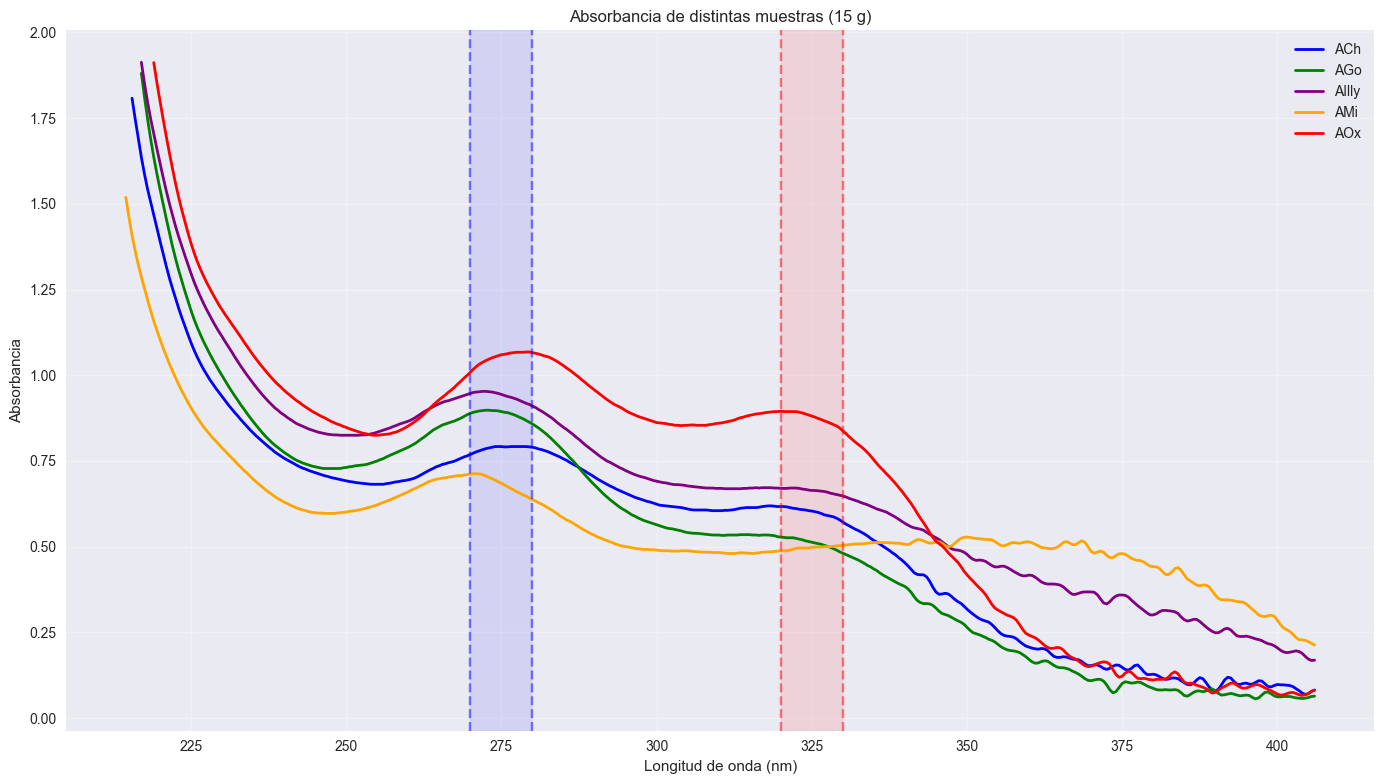

In [10]:
plot_absorbancia_con_bandas(df_todo, '15', 'Absorbancia de distintas muestras (15 g)')

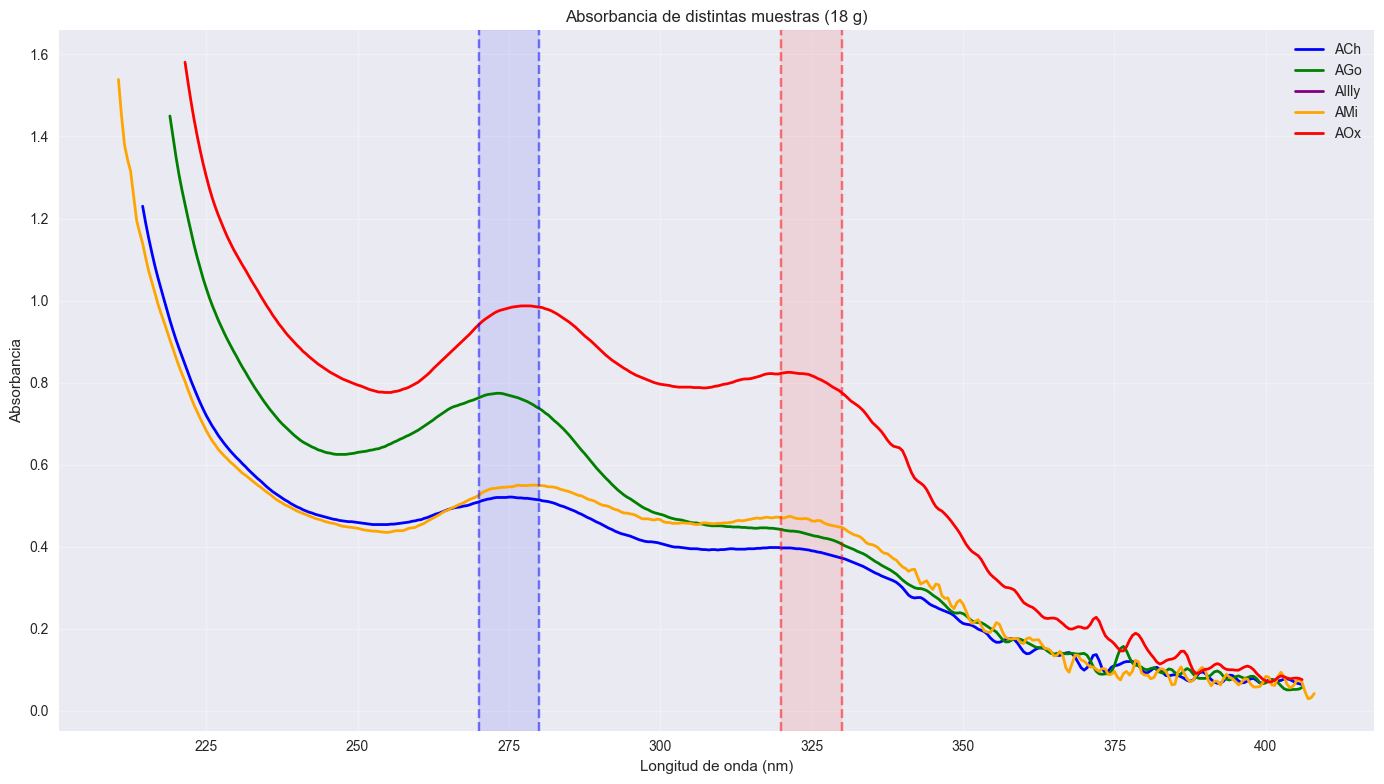

In [11]:
plot_absorbancia_con_bandas(df_todo, '18', 'Absorbancia de distintas muestras (18 g)')

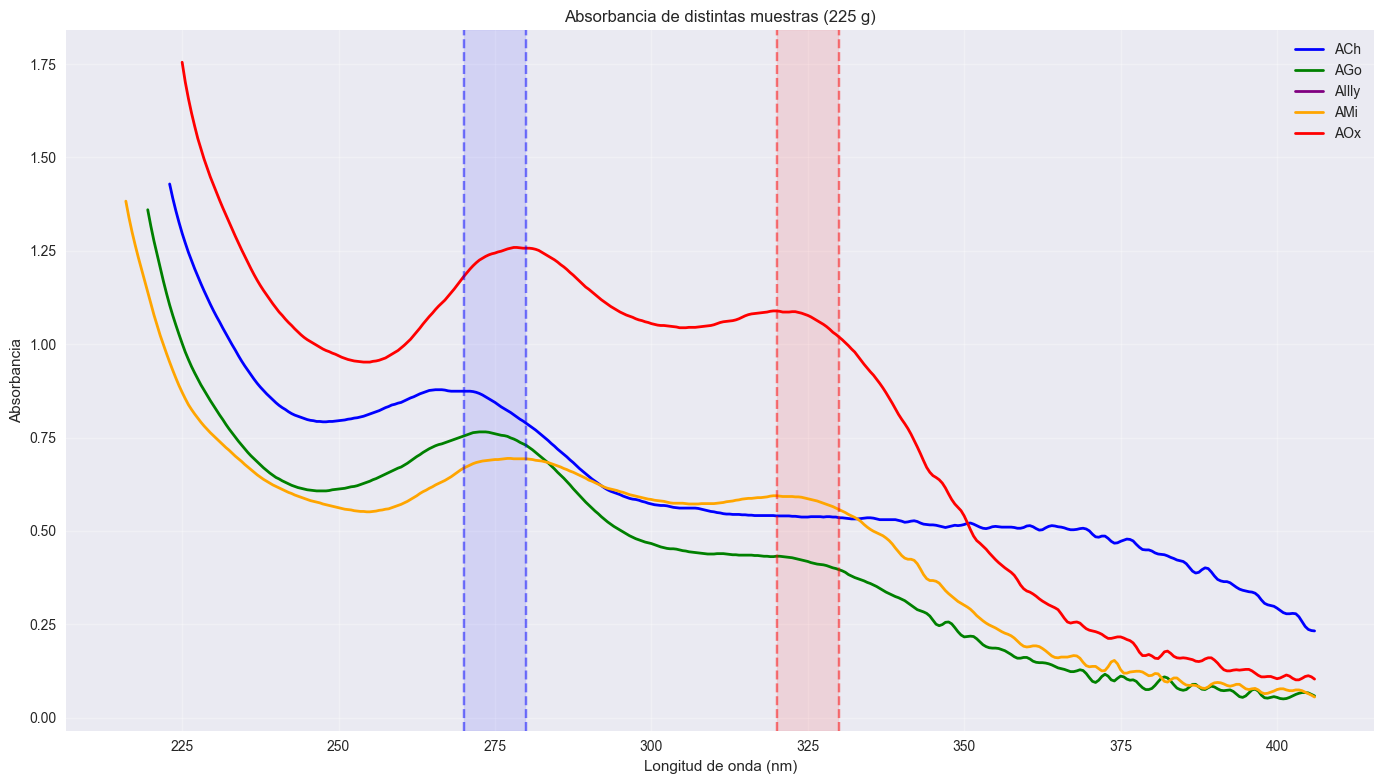

In [12]:
plot_absorbancia_con_bandas(df_todo, '225', 'Absorbancia de distintas muestras (225 g)')

### ZOOM: Análisis en el rango [260, 340] nm

Acotemos los datos al rango de interés para las bandas identificadas

In [26]:
# Filtrar datos en el rango [260, 340]
def filtrar_rango(df, nm_min=260, nm_max=340):
    return df[(df['nm'] >= nm_min) & (df['nm'] <= nm_max)].copy()

AGo_filtrado = filtrar_rango(AGo_copy)
ACh_filtrado = filtrar_rango(ACh_copy)
AIlly_filtrado = filtrar_rango(AIlly_copy)
AMi_filtrado = filtrar_rango(AMi_copy)
AOx_filtrado = filtrar_rango(AOx_copy)

print("Datos filtrados en el rango [260, 340] nm:")
print(f"- ACh_filtrado: {ACh_filtrado.shape[0]} puntos")
print(f"- AGo_filtrado: {AGo_filtrado.shape[0]} puntos")
print(f"- AIlly_filtrado: {AIlly_filtrado.shape[0]} puntos")
print(f"- AMi_filtrado: {AMi_filtrado.shape[0]} puntos")
print(f"- AOx_filtrado: {AOx_filtrado.shape[0]} puntos")

Datos filtrados en el rango [260, 340] nm:
- ACh_filtrado: 161 puntos
- AGo_filtrado: 161 puntos
- AIlly_filtrado: 161 puntos
- AMi_filtrado: 161 puntos
- AOx_filtrado: 161 puntos


In [24]:
# Crear dataframe combinado con datos filtrados
df_todo_filtrado = pd.concat([
    ACh_filtrado, AGo_filtrado, AIlly_filtrado, AMi_filtrado, AOx_filtrado
], ignore_index=True)

print(f"Dataframe filtrado combinado: {df_todo_filtrado.shape}")

Dataframe filtrado combinado: (805, 6)


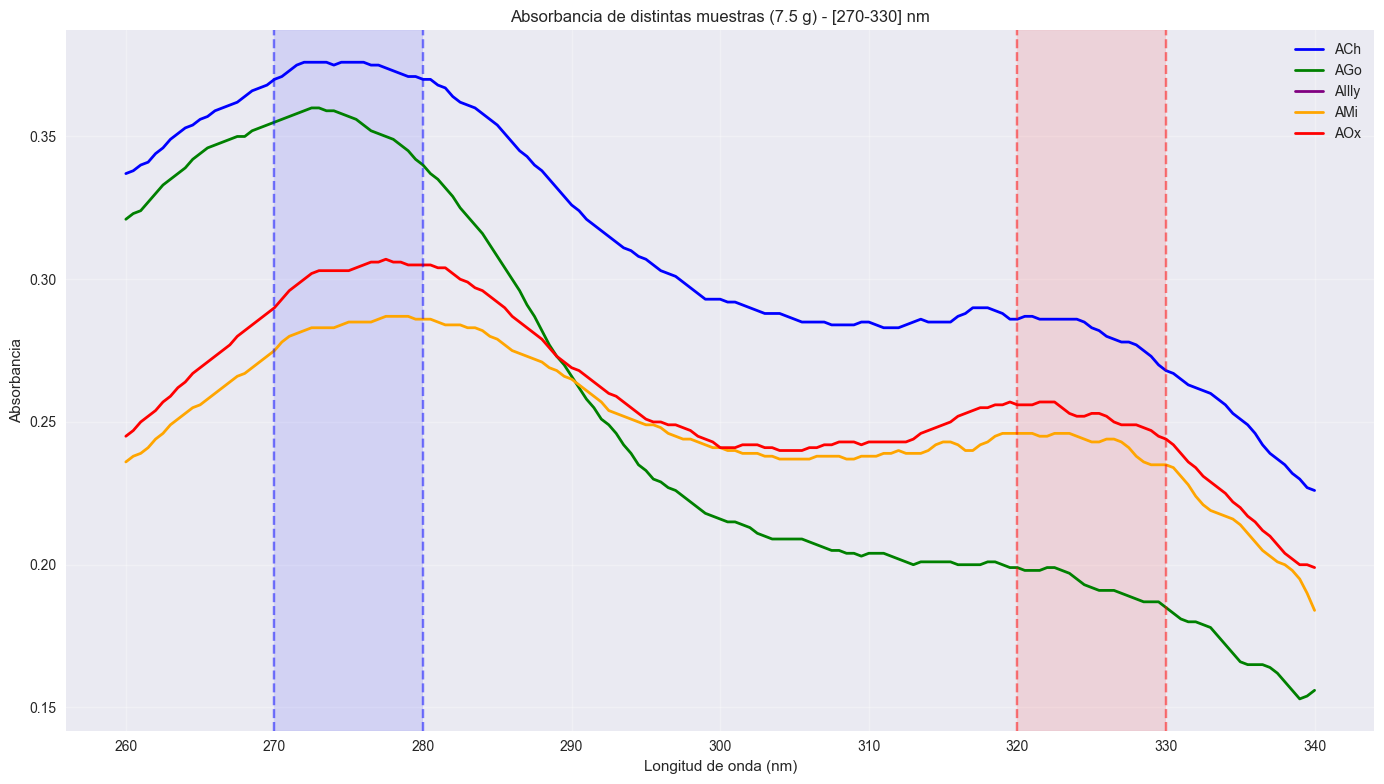

In [ ]:
# Gráficas filtradas para cada concentración
plot_absorbancia_con_bandas(df_todo_filtrado, '75', 'Absorbancia de distintas muestras (7.5 g) - [260-340] nm')

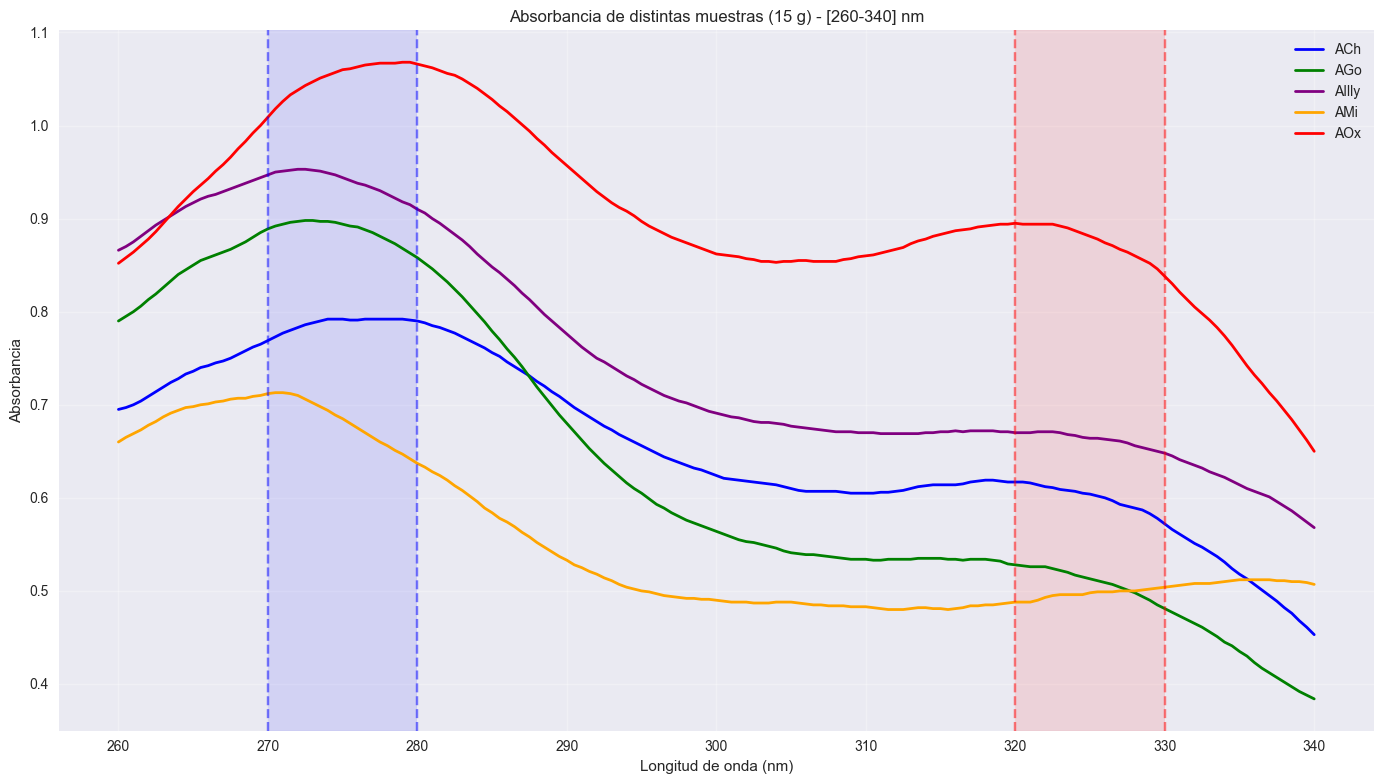

In [30]:
plot_absorbancia_con_bandas(df_todo_filtrado, '15', 'Absorbancia de distintas muestras (15 g) - [260-340] nm')

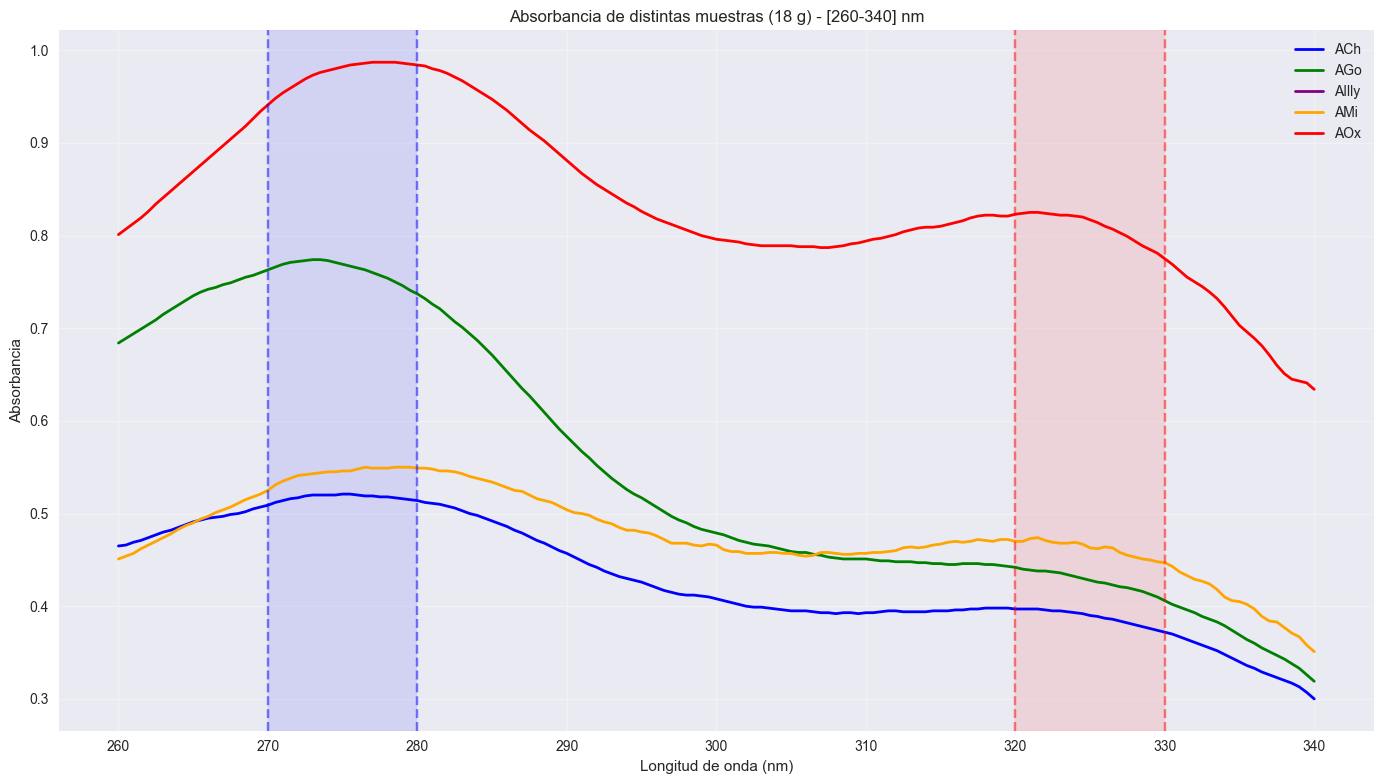

In [31]:
plot_absorbancia_con_bandas(df_todo_filtrado, '18', 'Absorbancia de distintas muestras (18 g) - [260-340] nm')

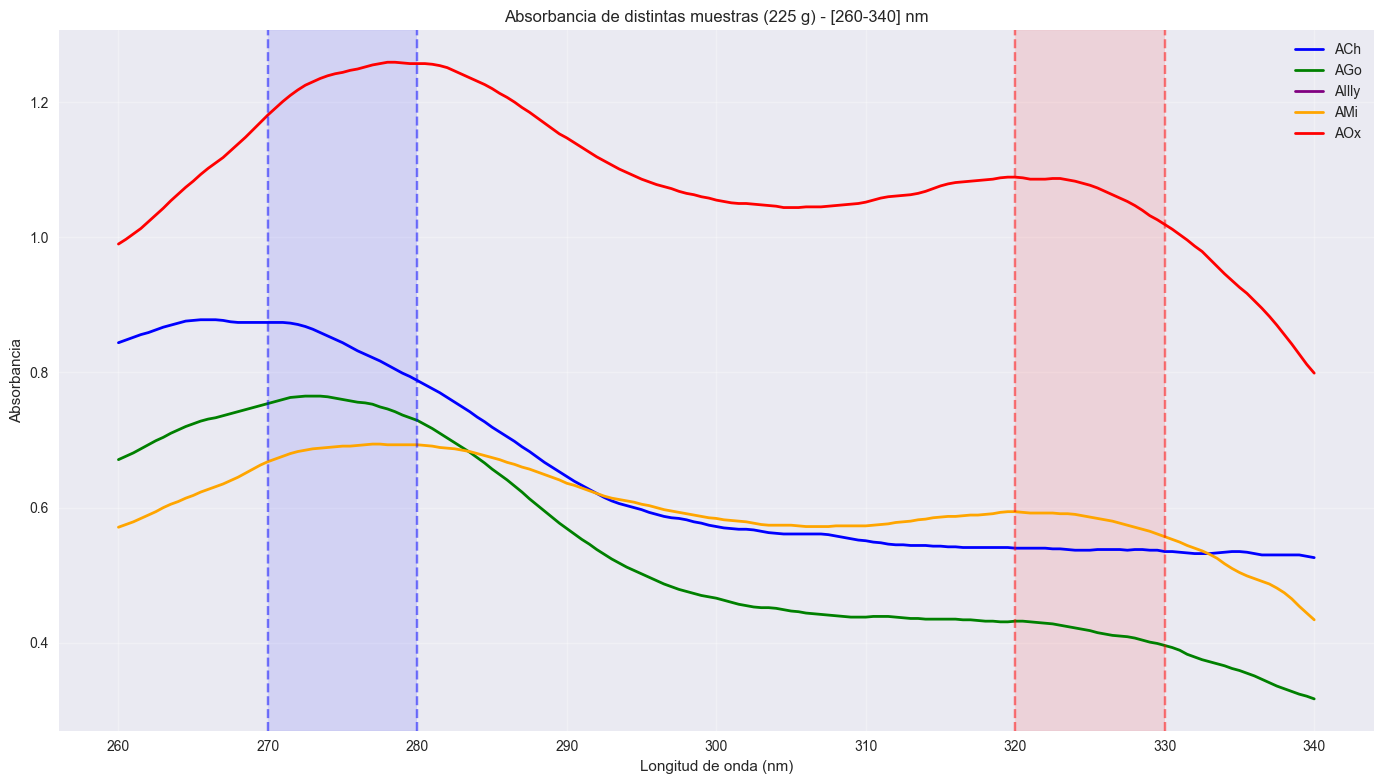

In [32]:
plot_absorbancia_con_bandas(df_todo_filtrado, '225', 'Absorbancia de distintas muestras (225 g) - [260-340] nm')

In [19]:
# Reemplazar NaN por 0 para el análisis de máximos
df_todo_filtrado_analisis = df_todo_filtrado.fillna(0)

### Análisis de Máximos por Grupo

Encontremos los valores máximos de absorbancia para cada muestra y concentración

In [20]:
# Función para encontrar máximos por grupo
def encontrar_maximos_por_grupo(df, columna):
    maximos = df.groupby('grupo').apply(
        lambda x: x[x[columna] == x[columna].max()]
    ).reset_index(drop=True)
    return maximos[['grupo', 'nm', columna]]

# Encontrar máximos para cada concentración
max_75 = encontrar_maximos_por_grupo(df_todo_filtrado_analisis, '75')
max_15 = encontrar_maximos_por_grupo(df_todo_filtrado_analisis, '15')
max_18 = encontrar_maximos_por_grupo(df_todo_filtrado_analisis, '18')
max_225 = encontrar_maximos_por_grupo(df_todo_filtrado_analisis, '225')

print("=== MÁXIMOS PARA 7.5g ===")
print(max_75.sort_values('grupo'))
print("\n=== MÁXIMOS PARA 15g ===")
print(max_15.sort_values('grupo'))
print("\n=== MÁXIMOS PARA 18g ===")
print(max_18.sort_values('grupo'))
print("\n=== MÁXIMOS PARA 225g ===")
print(max_225.sort_values('grupo'))

=== MÁXIMOS PARA 7.5g ===
    grupo     nm     75
0     ACh  272.0  0.376
1     ACh  272.5  0.376
2     ACh  273.0  0.376
3     ACh  273.5  0.376
4     ACh  274.5  0.376
..    ...    ...    ...
134   AMi  279.0  0.287
131   AMi  277.5  0.287
132   AMi  278.0  0.287
133   AMi  278.5  0.287
135   AOx  277.5  0.307

[136 rows x 3 columns]

=== MÁXIMOS PARA 15g ===
    grupo     nm     15
0     ACh  274.0  0.792
7     ACh  278.5  0.792
6     ACh  278.0  0.792
5     ACh  277.5  0.792
8     ACh  279.0  0.792
3     ACh  276.5  0.792
2     ACh  275.0  0.792
1     ACh  274.5  0.792
4     ACh  277.0  0.792
9     AGo  272.5  0.898
10    AGo  273.0  0.898
11  AIlly  272.0  0.953
12  AIlly  272.5  0.953
13    AMi  270.5  0.713
14    AMi  271.0  0.713
15    AOx  279.0  1.068
16    AOx  279.5  1.068

=== MÁXIMOS PARA 18g ===
     grupo     nm     18
0      ACh  275.0  0.521
1      ACh  275.5  0.521
2      AGo  273.0  0.774
3      AGo  273.5  0.774
83   AIlly  309.5  0.000
..     ...    ...    ...
128

C:\Users\lizor\AppData\Local\Temp\ipykernel_12276\4174683676.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maximos = df.groupby('grupo').apply(
C:\Users\lizor\AppData\Local\Temp\ipykernel_12276\4174683676.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maximos = df.groupby('grupo').apply(
C:\Users\lizor\AppData\Local\Temp\ipykernel_12276\4174683676.py:3: FutureWarning: DataFrameGroupBy.apply operated on the

### Resumen de Máximos de Bandas

Algunos máximos se repiten, indicando picos consistentes en las bandas de absorción.

#### Para 7.5g:
* **AIlly** - No disponible (valores en 0)
* **ACh** - Múltiples picos entre (272.0-276) nm / ~0.376
* **AGo** - Picos en (272.5-273) nm / ~0.360
* **AMi** - Picos en (277.5-279) nm / ~0.287
* **AOx** - Pico en 277.5 nm / ~0.307

#### Para 15g:
* **AIlly** - Picos en (272.0-272.5) nm / ~0.953
* **ACh** - Múltiples picos entre (274.0-279.0) nm / ~0.792
* **AGo** - Pico en 273.0 nm / ~0.898
* **AMi** - Picos en (270.5-271.0) nm / ~0.713
* **AOx** - Picos en (279.0-279.5) nm / ~1.068

#### Para 18g:
* **AIlly** - No disponible (valores en 0)
* **ACh** - Picos en (275.0-275.5) nm / ~0.521
* **AGo** - Picos en (273.0-273.5) nm / ~0.774
* **AMi** - Múltiples picos entre (276.5-279.5) nm / ~0.550
* **AOx** - Múltiples picos entre (277.0-278.5) nm / ~0.987

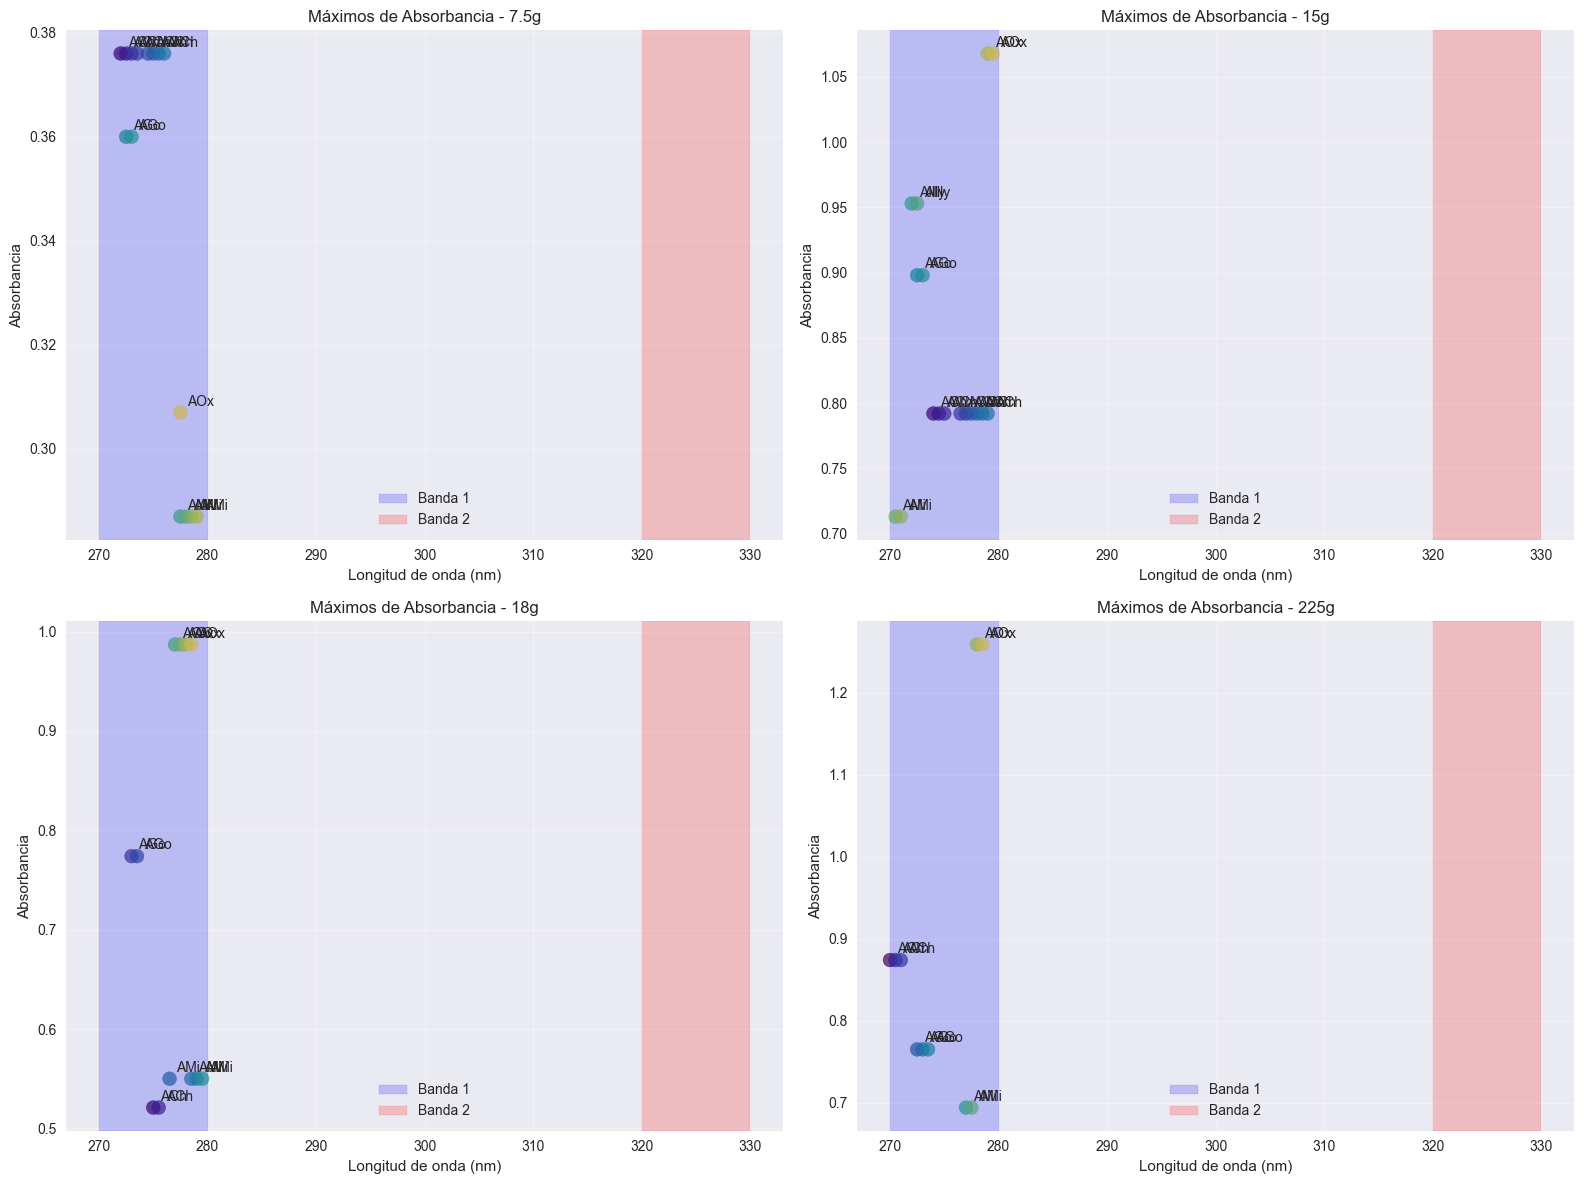

In [21]:
# Crear gráfico comparativo de máximos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
concentraciones = ['75', '15', '18', '225']
maximos_data = [max_75, max_15, max_18, max_225]
titles = ['7.5g', '15g', '18g', '225g']

for i, (ax, conc, maximos, title) in enumerate(zip(axes.flatten(), concentraciones, maximos_data, titles)):
    # Filtrar datos con valores > 0
    maximos_nonzero = maximos[maximos[conc] > 0]
    
    if not maximos_nonzero.empty:
        scatter = ax.scatter(maximos_nonzero['nm'], maximos_nonzero[conc], 
                           c=range(len(maximos_nonzero)), s=100, cmap='viridis', alpha=0.7)
        
        # Añadir etiquetas
        for _, row in maximos_nonzero.iterrows():
            ax.annotate(row['grupo'], (row['nm'], row[conc]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=10)
    
    # Líneas de bandas
    ax.axvspan(270, 280, alpha=0.2, color='blue', label='Banda 1')
    ax.axvspan(320, 330, alpha=0.2, color='red', label='Banda 2')
    
    ax.set_xlabel('Longitud de onda (nm)')
    ax.set_ylabel('Absorbancia')
    ax.set_title(f'Máximos de Absorbancia - {title}')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

## Ahora visualicemos las gráficas dentro de Absorbancia-Reflectancia y graficotya

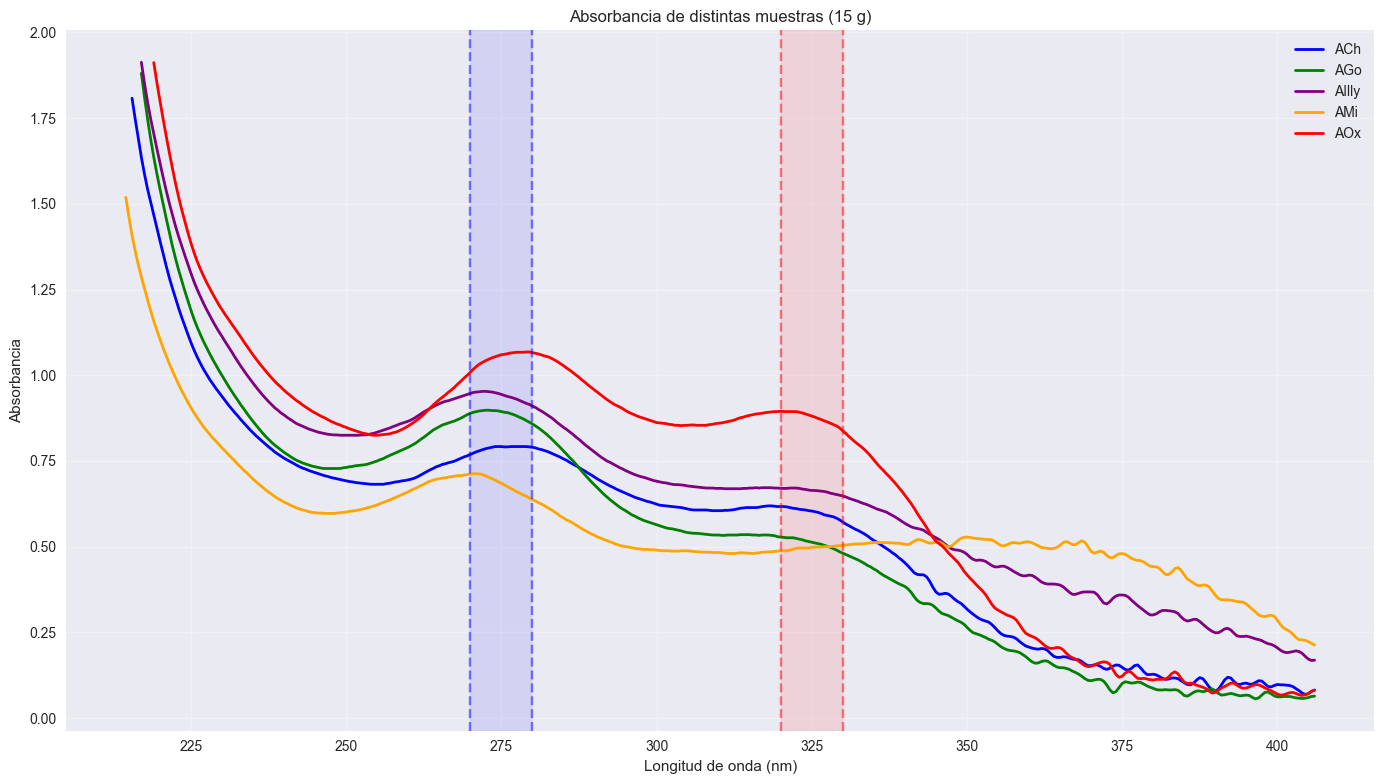

In [ ]:


plot_absorbancia_con_bandas(df_todo, '15', 'Absorbancia de distintas muestras (15 g)')